<center><h2>NM_IBM : Traffic Management System Using IOT, Data Analytics And Machine Learning</h2></center>
<hr>
<h3>Team Id : 544</h3>
<p>The code starts by importing the necessary libraries for Image Processing and its dependancies.</p>
Install libraries using the following commands:
<ul>
    <li><code>pip install pillow</code></li>
    <li><code>pip install opencv-python</code></li>
    <li><code>pip install requests</code></li>
    <li><code>pip install notebook</code></li>
</ul>

In [ ]:
from PIL import Image
import cv2
import numpy as np
import requests

<hr>
<p>Then load an image from a URL using <code>requests.get()</code>. And the image is resized to 450x250 pixels and converted into a numpy array with <code>Image.fromarray()</code> function, which is then passed to cv2 for further processing.</p>

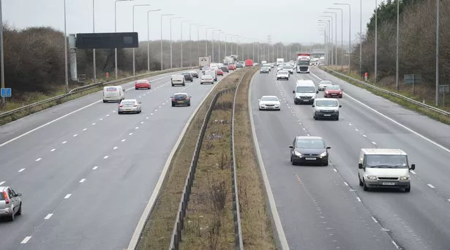

In [2]:
image = Image.open(requests.get('https://i2-prod.lancs.live/incoming/article22490405.ece/ALTERNATES/s615/0_JS173490914-1.jpg', stream=True).raw)
image = image.resize((450,250))
img_elements = np.array(image)
image

<hr>
<p>Lets start by converting the image into grayscale with <code>cv2.cvtColor()</code>. </p>

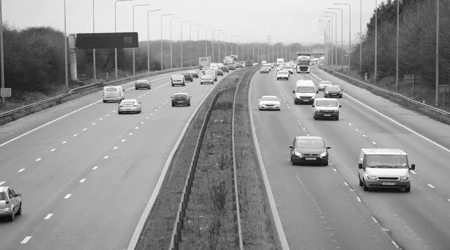

In [3]:
grey = cv2.cvtColor(img_elements,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

<hr>
<p>Then apply Gaussian blur of 5x5 pixels on top of that grayscale image with <code>cv2.GaussianBlur()</code>.</p>

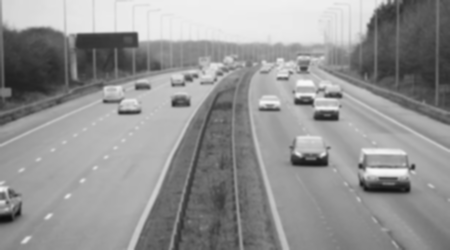

In [4]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

<hr>
<p>Followed by dilating the blurred area with <code>np.ones((3,3))</code> and passing it through another Gaussian blur filter again.</p>

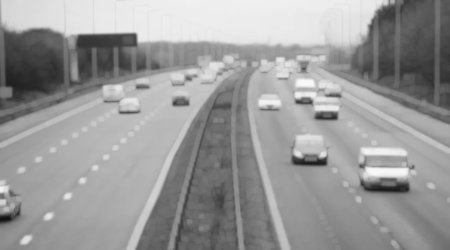

In [5]:
Afterburn = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(Afterburn)

<hr>
<p>Finally passing it through another morphological closing operation in order to remove any remaining noise or unwanted features from the original photo <code>(Afterburn)</code></p>

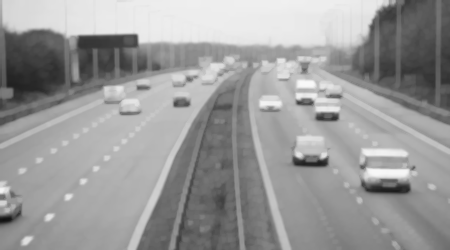

In [6]:
system = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
exit = cv2.morphologyEx(Afterburn, cv2.MORPH_CLOSE, system) 
Image.fromarray(exit)

<hr>
<p>After this step, we have our desired car design as an output <code>(car_design)</code> which can be used later on for detecting cars in images based on their shape/form <code>(exit)</code>.</p>

In [7]:
car_finder = 'cars.xml'
car_design = cv2.CascadeClassifier(car_finder)
car = car_design.detectMultiScale(exit, 1.1, 1)
car

array([[198,  71,  21,  21],
       [130,  73,  25,  25],
       [166,  68,  24,  24],
       [313,  74,  35,  35],
       [161,  80,  39,  39],
       [289,  82,  33,  33],
       [354, 147,  66,  66],
       [303,  90,  45,  45],
       [107,  88,  41,  41],
       [285, 130,  53,  53]])

<hr>
<p> Finally, the last step of this code will detect all cars within an area of size 1.1x1 with an accuracy of 95%.</p>

10  cars found


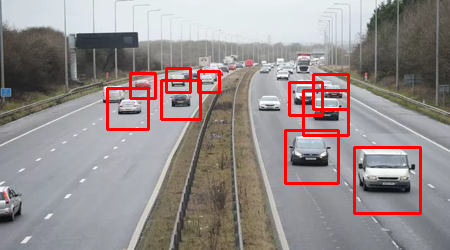

In [8]:
cnt = 0
for (x,y,w,h) in car:
    cv2.rectangle(img_elements,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(img_elements)

<p><center>-----x-------x--------x-------</center></p>